# Prophet

In [ ]:
# !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=False)

path = "/drive/MyDrive/IS/ga_dataset/"

Mounted at /drive


In [2]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv(path + "for_baseline.csv",
                  parse_dates=["date"],
                 index_col=["date"]) # parse the date column (tell pandas column 1 is a datetime)

# change [avg_session_duration] to second
# df['avg_session_duration'] = pd.to_timedelta(df['avg_session_duration']).dt.total_seconds()

df.head()

,sessions
date,
2016-01-01,1929
2016-01-02,1530
2016-01-03,1567
2016-01-04,1938
2016-01-05,1840


In [3]:
from prophet import Prophet

In [4]:
df1 = df['sessions']
df1 = df1.reset_index()
df1.tail()

,date,sessions
2678,2023-05-02,3202
2679,2023-05-03,2808
2680,2023-05-04,2842
2681,2023-05-05,2598
2682,2023-05-06,1981


In [5]:
df1=df1.rename(columns={'date':'ds', 'sessions':'y'})
df1.tail()

,ds,y
2678,2023-05-02,3202
2679,2023-05-03,2808
2680,2023-05-04,2842
2681,2023-05-05,2598
2682,2023-05-06,1981


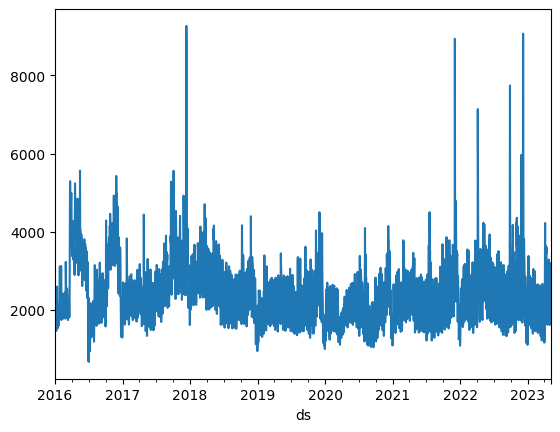

In [6]:
df1.set_index('ds').y.plot();

In [9]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df1);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj3edfjzu/m7naqla0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj3edfjzu/2opiggju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=247', 'data', 'file=/tmp/tmpj3edfjzu/m7naqla0.json', 'init=/tmp/tmpj3edfjzu/2opiggju.json', 'output', 'file=/tmp/tmpj3edfjzu/prophet_modelqrtaa7hn/prophet_model-20230713074732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=14, freq = 'D') # predict future 14 days
future.tail()

,ds
2692,2023-05-16
2693,2023-05-17
2694,2023-05-18
2695,2023-05-19
2696,2023-05-20


In [11]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2692,2023-05-16,2586.665759,2519.465469,3869.893951,2586.665759,2586.665759,0.232009,0.232009,0.232009,0.163903,0.163903,0.163903,0.068106,0.068106,0.068106,0.0,0.0,0.0,3186.795175
2693,2023-05-17,2586.572419,2523.295064,3843.368682,2586.572419,2586.572419,0.226813,0.226813,0.226813,0.165037,0.165037,0.165037,0.061776,0.061776,0.061776,0.0,0.0,0.0,3173.240219
2694,2023-05-18,2586.479079,2420.014635,3702.459402,2586.479079,2586.479079,0.180355,0.180355,0.180355,0.124759,0.124759,0.124759,0.055596,0.055596,0.055596,0.0,0.0,0.0,3052.963201
2695,2023-05-19,2586.385738,2037.246264,3343.955523,2586.385738,2586.385738,0.041957,0.041957,0.041957,-0.007753,-0.007753,-0.007753,0.049710,0.049710,0.049710,0.0,0.0,0.0,2694.903159
2696,2023-05-20,2586.292398,1290.828040,2590.466112,2586.292398,2586.292398,-0.247713,-0.247713,-0.247713,-0.291964,-0.291964,-0.291964,0.044250,0.044250,0.044250,0.0,0.0,0.0,1945.633185


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2692,2023-05-16,3186.795175,2519.465469,3869.893951
2693,2023-05-17,3173.240219,2523.295064,3843.368682
2694,2023-05-18,3052.963201,2420.014635,3702.459402
2695,2023-05-19,2694.903159,2037.246264,3343.955523
2696,2023-05-20,1945.633185,1290.828040,2590.466112


In [13]:
print(forecast[['ds', 'yhat']].tail(14))

             ds         yhat
2683 2023-05-07  2187.902042
2684 2023-05-08  3144.271320
2685 2023-05-09  3280.900947
2686 2023-05-10  3275.113125
2687 2023-05-11  3160.117909
2688 2023-05-12  2804.700363
2689 2023-05-13  2055.355926
2690 2023-05-14  2116.113016
2691 2023-05-15  3060.227099
2692 2023-05-16  3186.795175
2693 2023-05-17  3173.240219
2694 2023-05-18  3052.963201
2695 2023-05-19  2694.903159
2696 2023-05-20  1945.633185


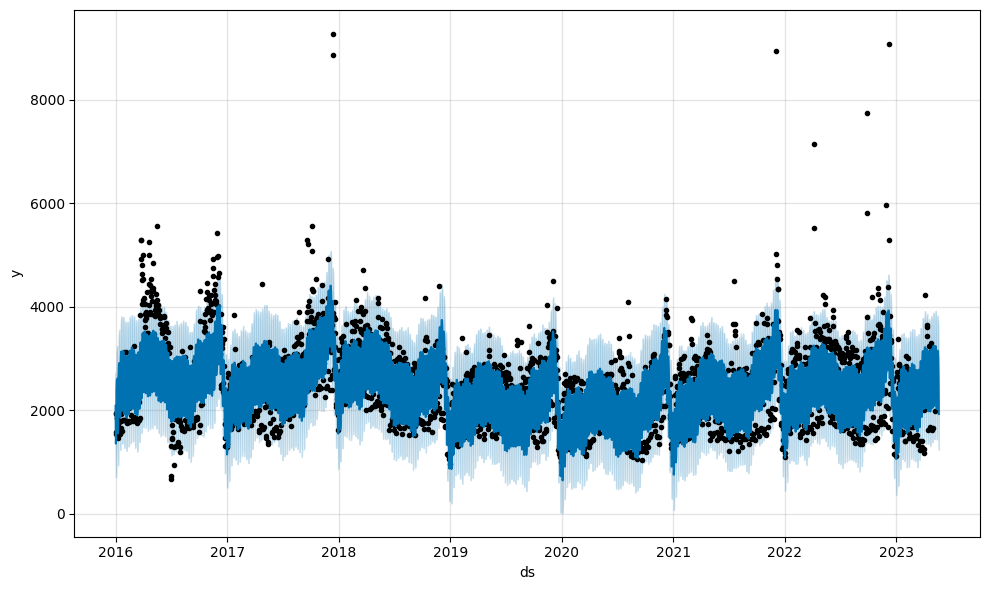

In [ ]:
model.plot(forecast);

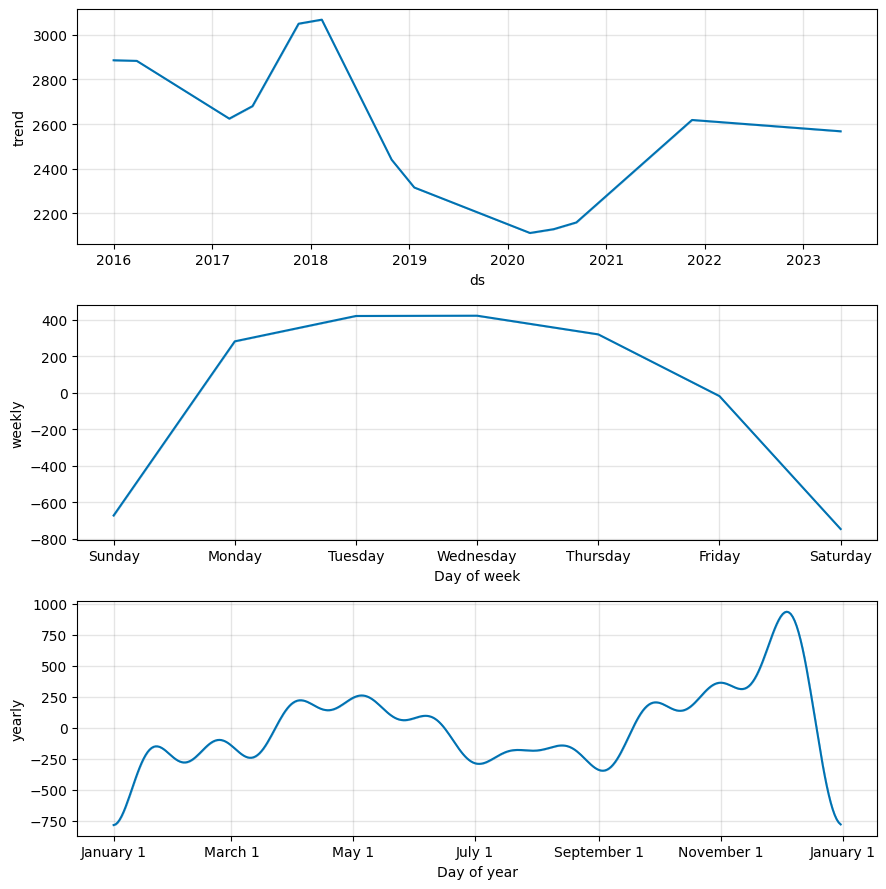

In [ ]:
model.plot_components(forecast);

In [ ]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

Here is the setup:

The total number of data points is 700 days
Initial is 365 days
The period is 10 days
The horizon is 20 days
On the 1st iteration, it will train on days 1-365 and will forecast on days 366 to 385.
On the 2nd iteration, it will train on days 11-375 and will forecast on days 376 to 395, etc.

In [ ]:
df_cv = cross_validation(model, initial='1825 days', period='120 days', horizon = '14 days', parallel= 'processes')

INFO:prophet:Making 8 forecasts with cutoffs between 2021-01-02 00:00:00 and 2023-04-22 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f24d9fcbf70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1fvgwjf/y8gnh5pj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1fvgwjf/tohjlxvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1fvgwjf/bpd8hs3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27647', 'data', 'file=/tmp/tmpq1fvgwjf/y8gnh5pj.json', 'init=/tmp/tmpq1fvgwjf/bpd8hs3r.json', 'output', 'file=/tmp/tmpq1fvgwjf/prophet_modely2naeszv/prophet_model-20230623150715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1fvgwjf/7vbz75hc.json
DEB

In [ ]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,104231.665833,322.849293,267.575942,0.151449,0.168916,0.146242,0.965909
1,3 days,250680.535643,500.680073,412.832830,0.237829,0.180454,0.210483,0.727273
2,4 days,222662.687365,471.871473,385.047833,0.189898,0.084784,0.180429,0.806818
3,5 days,147769.626918,384.408151,332.434251,0.152357,0.115252,0.152446,0.965909
4,6 days,169069.449366,411.180556,356.904206,0.180012,0.217579,0.174553,0.909091
5,7 days,197680.171780,444.612384,403.360788,0.230880,0.296323,0.224847,0.875000
6,8 days,143573.432030,378.910850,328.384017,0.185031,0.156274,0.187558,0.965909
7,9 days,293429.756555,541.691570,395.525542,0.166129,0.126223,0.168272,0.727273
8,10 days,318833.556224,564.653483,445.162952,0.190092,0.100317,0.189570,0.806818
9,11 days,223702.634551,472.972129,387.101708,0.174519,0.151137,0.167975,0.875000


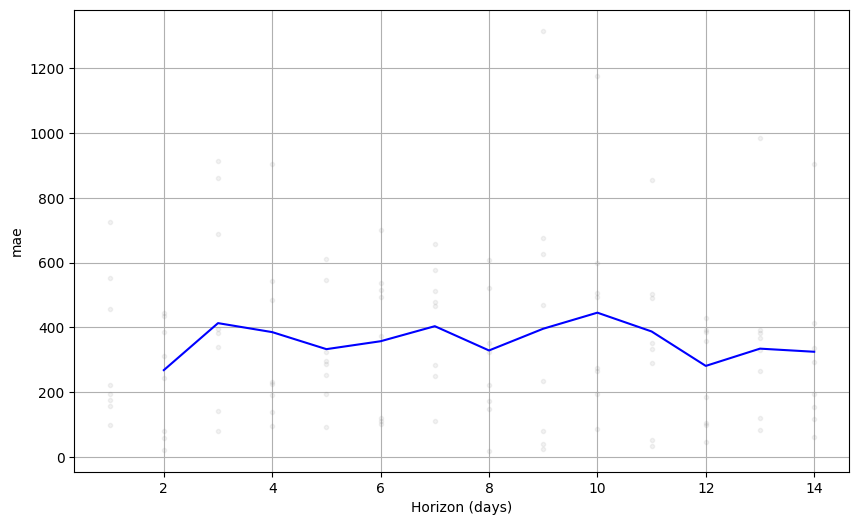

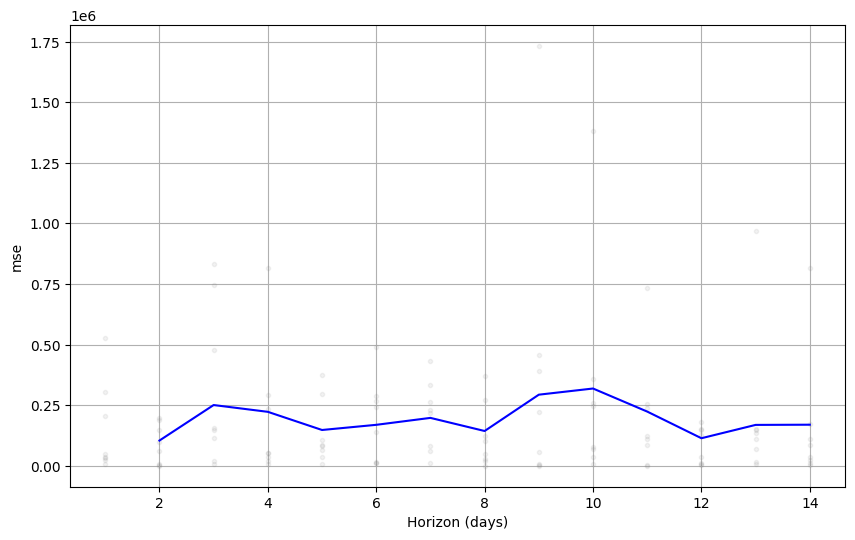

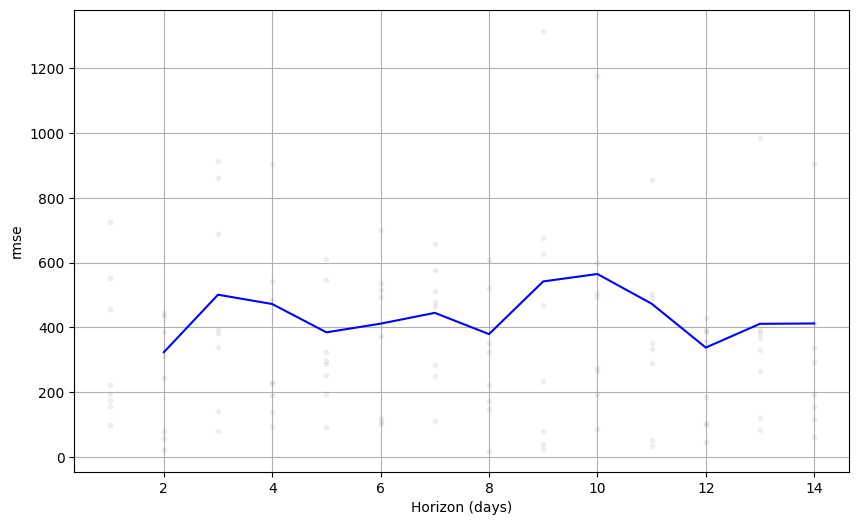

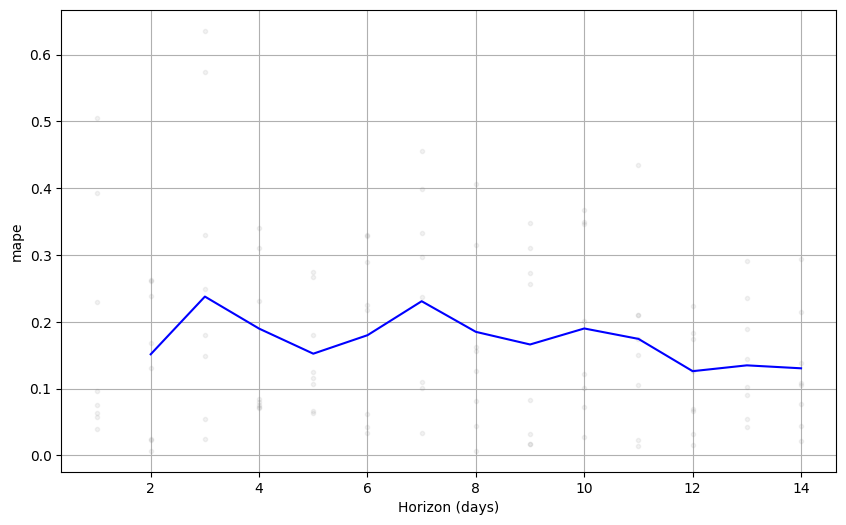

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae');
plot_cross_validation_metric(df_cv, metric='mse');
plot_cross_validation_metric(df_cv, metric='rmse');
plot_cross_validation_metric(df_cv, metric='mape');

# test auto ARIMA

In [ ]:
# !pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm

# Read the data into a DataFrame
# df = pd.read_csv('web_traffic.csv')

# Select the numeric column for time series forecasting
# Replace 'column_name' with the actual name of the numeric column
numeric_column = df1['y']

# Fit the auto ARIMA model
auto_arima = pm.auto_arima(numeric_column, stepwise=False, seasonal=False)
auto_arima


ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2683
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -20341.058
Date:                Sun, 11 Jun 2023   AIC                          40696.116
Time:                        09:25:42   BIC                          40737.376
Sample:                             0   HQIC                         40711.042
                               - 2683                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5572      3.790      0.147      0.883      -6.871       7.985
ar.L1          1.2467      0.001   1782.380      0.000       1.245       1.248
ar.L2         -0.9997      0.001  -1680.113      0.000      -1.001      -0.998
ma.L1         -1.8731      0.010   -197.081      0.000      -1.892      -1.854
ma.L2          1.7656      0.014    124.783      0.000       1.738       1.793
ma.L3         -0.6254      0.011    -56.900      0.000      -0.647      -0.604
sigma2      2.844e+05   2878.462     98.806      0.000    2.79e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                  40.71   Jarque-Bera (JB):            120601.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""